In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

user_details=pd.read_excel("Assignment.xlsx",sheet_name='UserDetails.csv')
cooking_sessions=pd.read_excel("Assignment.xlsx",sheet_name='CookingSessions.csv')
order_details=pd.read_excel("Assignment.xlsx",sheet_name='OrderDetails.csv')

In [13]:
order_details.shape

(16, 10)

In [14]:
user_details.columns
cooking_sessions.columns
order_details.columns

Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')

In [15]:
##task 1 cleaning and merging the data

In [16]:
#Removing null values data from three dataset
user_details.dropna(inplace=True)
cooking_sessions.dropna(inplace=True)
order_details.dropna(inplace=True)

In [17]:
order_details.shape

(14, 10)

In [18]:
# Merge UserDetails and CookingSessions on 'User ID'
merged_user_cooking = pd.merge(user_details, cooking_sessions, on='User ID', how='inner', suffixes=('', '_cooking'))

# Merge the result with OrderDetails on 'Session ID'
df = pd.merge(merged_user_cooking, order_details, on='Session ID', how='inner', suffixes=('', '_order'))
df.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID', 'Dish Name',
       'Meal Type', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'User ID_order', 'Order Date',
       'Meal Type_order', 'Dish Name_order', 'Order Status', 'Amount (USD)',
       'Time of Day', 'Rating'],
      dtype='object')

In [45]:
# Droping unnecessary columns to keep only one instance of each column
#merged_df.drop(columns=[ 'User ID_order', 'Dish Name_order', 'Meal Type_order'], inplace=True)
df.head(5)

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Rating,Order ID,User ID_order,Order Date,Meal Type_order,Dish Name_order,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [20]:
# Task 2 Analyzing the relationship between cooking sessions and user orders


In [26]:
# Filter completed orders
completed_orders = df[df['Order Status'] == 'Completed']

# Calculating average session rating and order rating for completed orders
average_session_rating_completed = completed_orders['Session Rating'].mean()
average_order_rating_completed = completed_orders['Rating'].mean()

# Calculating average session duration for completed orders
average_duration_completed = completed_orders['Duration (mins)'].mean()

# Group by Order Status to compare session ratings, order ratings, and durations
session_rating_by_order_status = df.groupby('Order Status')['Session Rating'].mean()
order_rating_by_order_status = df.groupby('Order Status')['Rating'].mean()
duration_by_order_status = df.groupby('Order Status')['Duration (mins)'].mean()

# Printing results
print("Average Session Rating for Completed Orders:", average_session_rating_completed)
print("Average Order Rating for Completed Orders:", average_order_rating_completed)
print("Average Session Duration for Completed Orders (mins):", average_duration_completed)
print("\nAverage Session Rating by Order Status:\n", session_rating_by_order_status)
print("\nAverage Order Rating by Order Status:\n", order_rating_by_order_status)
print("\nAverage Session Duration by Order Status (mins):\n", duration_by_order_status)

Average Session Rating for Completed Orders: 4.507142857142857
Average Order Rating for Completed Orders: 4.285714285714286
Average Session Duration for Completed Orders (mins): 30.357142857142858

Average Session Rating by Order Status:
 Order Status
Completed    4.507143
Name: Session Rating, dtype: float64

Average Order Rating by Order Status:
 Order Status
Completed    4.285714
Name: Rating, dtype: float64

Average Session Duration by Order Status (mins):
 Order Status
Completed    30.357143
Name: Duration (mins), dtype: float64


In [48]:
# Filtering the DataFrame for relevant columns
dish_data = df[['Dish Name', 'Rating', 'Session Rating', 'Duration (mins)']]

# Calculating average ratings and session duration for each dish
dish_analysis = dish_data.groupby('Dish Name').agg({
    'Rating': 'mean',
    'Session Rating': 'mean',
    'Duration (mins)': 'mean',
    }).reset_index()

dish_analysis.columns = ['Dish Name', 'Avg Order Rating', 'Avg Session Rating', 'Avg Duration (mins)']

# Sorting dishes by average order rating, session rating, and completion rate
popular_dishes_df = dish_analysis.sort_values(by=['Avg Order Rating', 'Avg Session Rating'], ascending=False)

# Printing the resulting DataFrame
print("Popular Dishes DataFrame:\n", popular_dishes_df)
popular_dishes_df.to_excel('output.xlsx', index=False)

Popular Dishes DataFrame:
          Dish Name  Avg Order Rating  Avg Session Rating  Avg Duration (mins)
1  Grilled Chicken          4.666667            4.766667            43.333333
4        Spaghetti          4.500000            4.625000            35.000000
3         Pancakes          4.000000            4.400000            30.000000
0     Caesar Salad          4.000000            4.366667            21.666667
5    Veggie Burger          4.000000            4.300000            20.000000
2          Oatmeal          4.000000            4.100000            10.000000


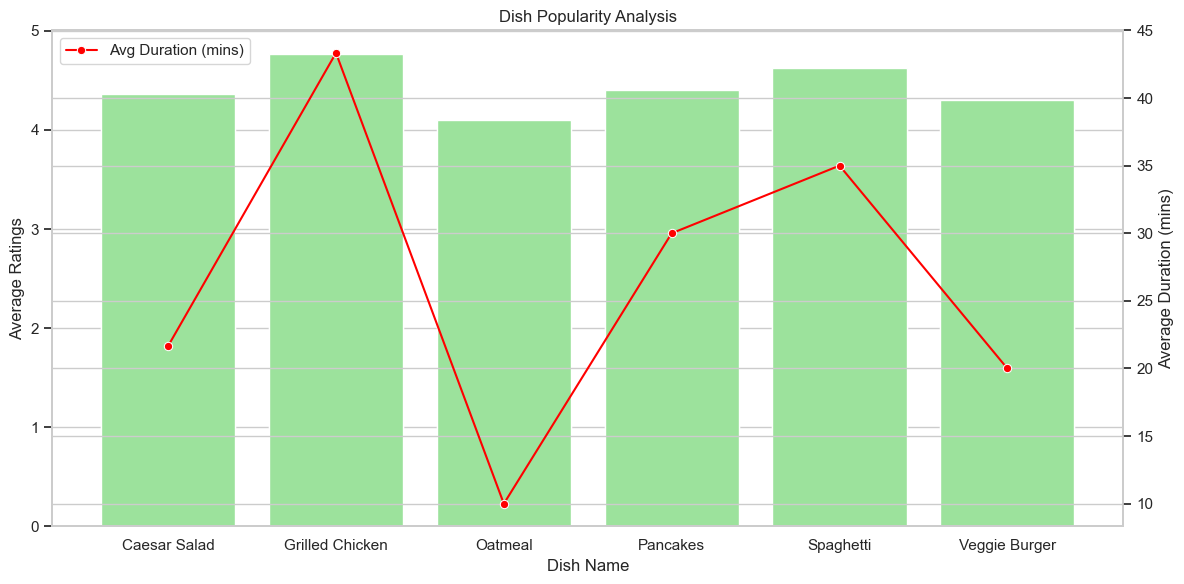

In [30]:
# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Bar plot for average order rating and session rating
ax1 = sns.barplot(x='Dish Name', y='Avg Order Rating', data=dish_analysis, color='skyblue', label='Avg Order Rating')
ax2 = sns.barplot(x='Dish Name', y='Avg Session Rating', data=dish_analysis, color='lightgreen', label='Avg Session Rating')

# Create another Y-axis for duration
ax3 = ax1.twinx()
sns.lineplot(x='Dish Name', y='Avg Duration (mins)', data=dish_analysis, color='red', marker='o', label='Avg Duration (mins)', ax=ax3)

# Adding labels and title
ax1.set_ylabel('Average Ratings')
ax3.set_ylabel('Average Duration (mins)')
plt.title('Dish Popularity Analysis')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
# Calculating total orders and average session rating by age
age_analysis = df.groupby('Age').agg({
    'Total Orders': 'sum',
    'Session Rating': 'mean',
    'Amount (USD)': 'mean'
}).reset_index()

# Calculating total orders and average session rating by location
location_analysis = df.groupby('Location').agg({
    'Total Orders': 'sum',
    'Session Rating': 'mean',
    'Amount (USD)': 'mean'
}).reset_index()

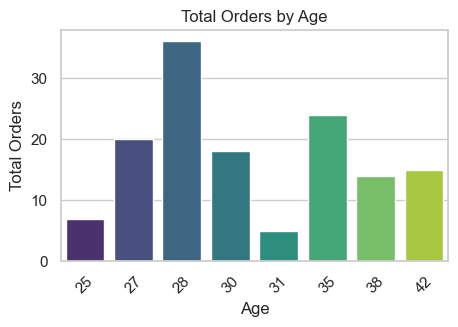

In [37]:
# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x='Age', y='Total Orders', data=age_analysis, palette='viridis')
plt.title('Total Orders by Age')
plt.xticks(rotation=45)
plt.show()

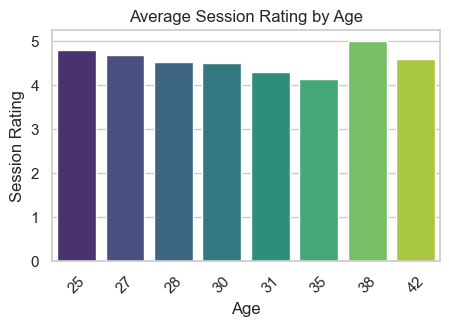

In [38]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Age', y='Session Rating', data=age_analysis, palette='viridis')
plt.title('Average Session Rating by Age')
plt.xticks(rotation=45)
plt.show()

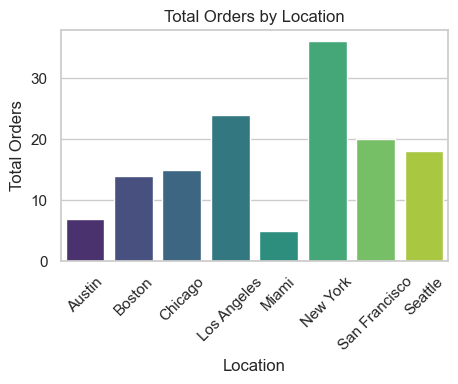

In [39]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Location', y='Total Orders', data=location_analysis, palette='viridis')
plt.title('Total Orders by Location')
plt.xticks(rotation=45)
plt.show()

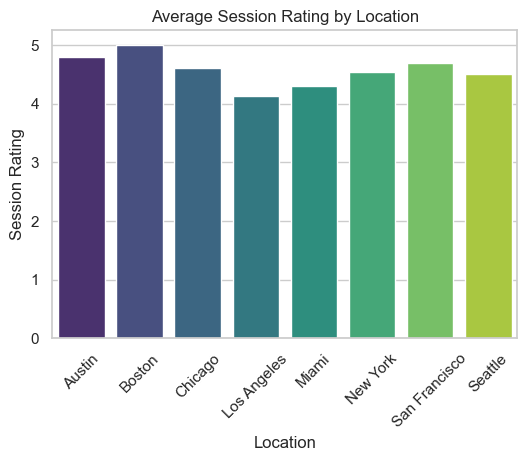

In [40]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Location', y='Session Rating', data=location_analysis, palette='viridis')
plt.title('Average Session Rating by Location')
plt.xticks(rotation=45)
plt.show()

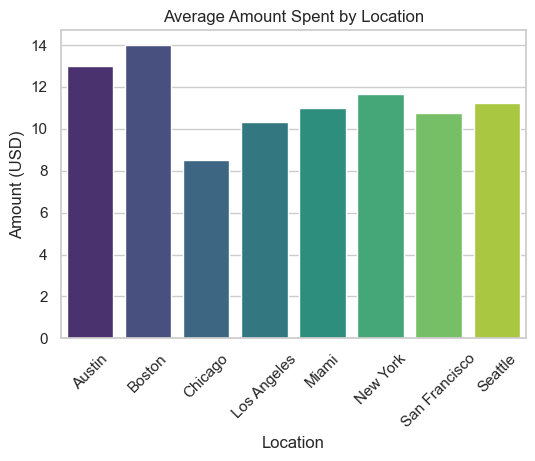

In [41]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Location', y='Amount (USD)', data=location_analysis, palette='viridis')
plt.title('Average Amount Spent by Location')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Print the results
print("Analysis by Age:")
print(age_analysis)

print("\nAnalysis by Location:")
print(location_analysis)
age_analysis.to_excel("output.xlsx")

Analysis by Age:
   Age  Total Orders  Session Rating  Amount (USD)
0   25             7        4.800000     13.000000
1   27            20        4.700000     10.750000
2   28            36        4.533333     11.666667
3   30            18        4.500000     11.250000
4   31             5        4.300000     11.000000
5   35            24        4.133333     10.333333
6   38            14        5.000000     14.000000
7   42            15        4.600000      8.500000

Analysis by Location:
        Location  Total Orders  Session Rating  Amount (USD)
0         Austin             7        4.800000     13.000000
1         Boston            14        5.000000     14.000000
2        Chicago            15        4.600000      8.500000
3    Los Angeles            24        4.133333     10.333333
4          Miami             5        4.300000     11.000000
5       New York            36        4.533333     11.666667
6  San Francisco            20        4.700000     10.750000
7        Seat